In [15]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!mamba install html5lib==1.1 -y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [16]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [38]:
tesla = yf.Ticker("TSLA")

In [39]:
tesla_data = tesla.history(period="max")

In [40]:
tesla_data.reset_index(inplace=True)

In [41]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [42]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

In [43]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

In [44]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    tesla_revenue = tesla_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)    

In [45]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [46]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [51]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [52]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

In [53]:
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])

In [54]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    gme_revenue = gme_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)    

In [55]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [56]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [34]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

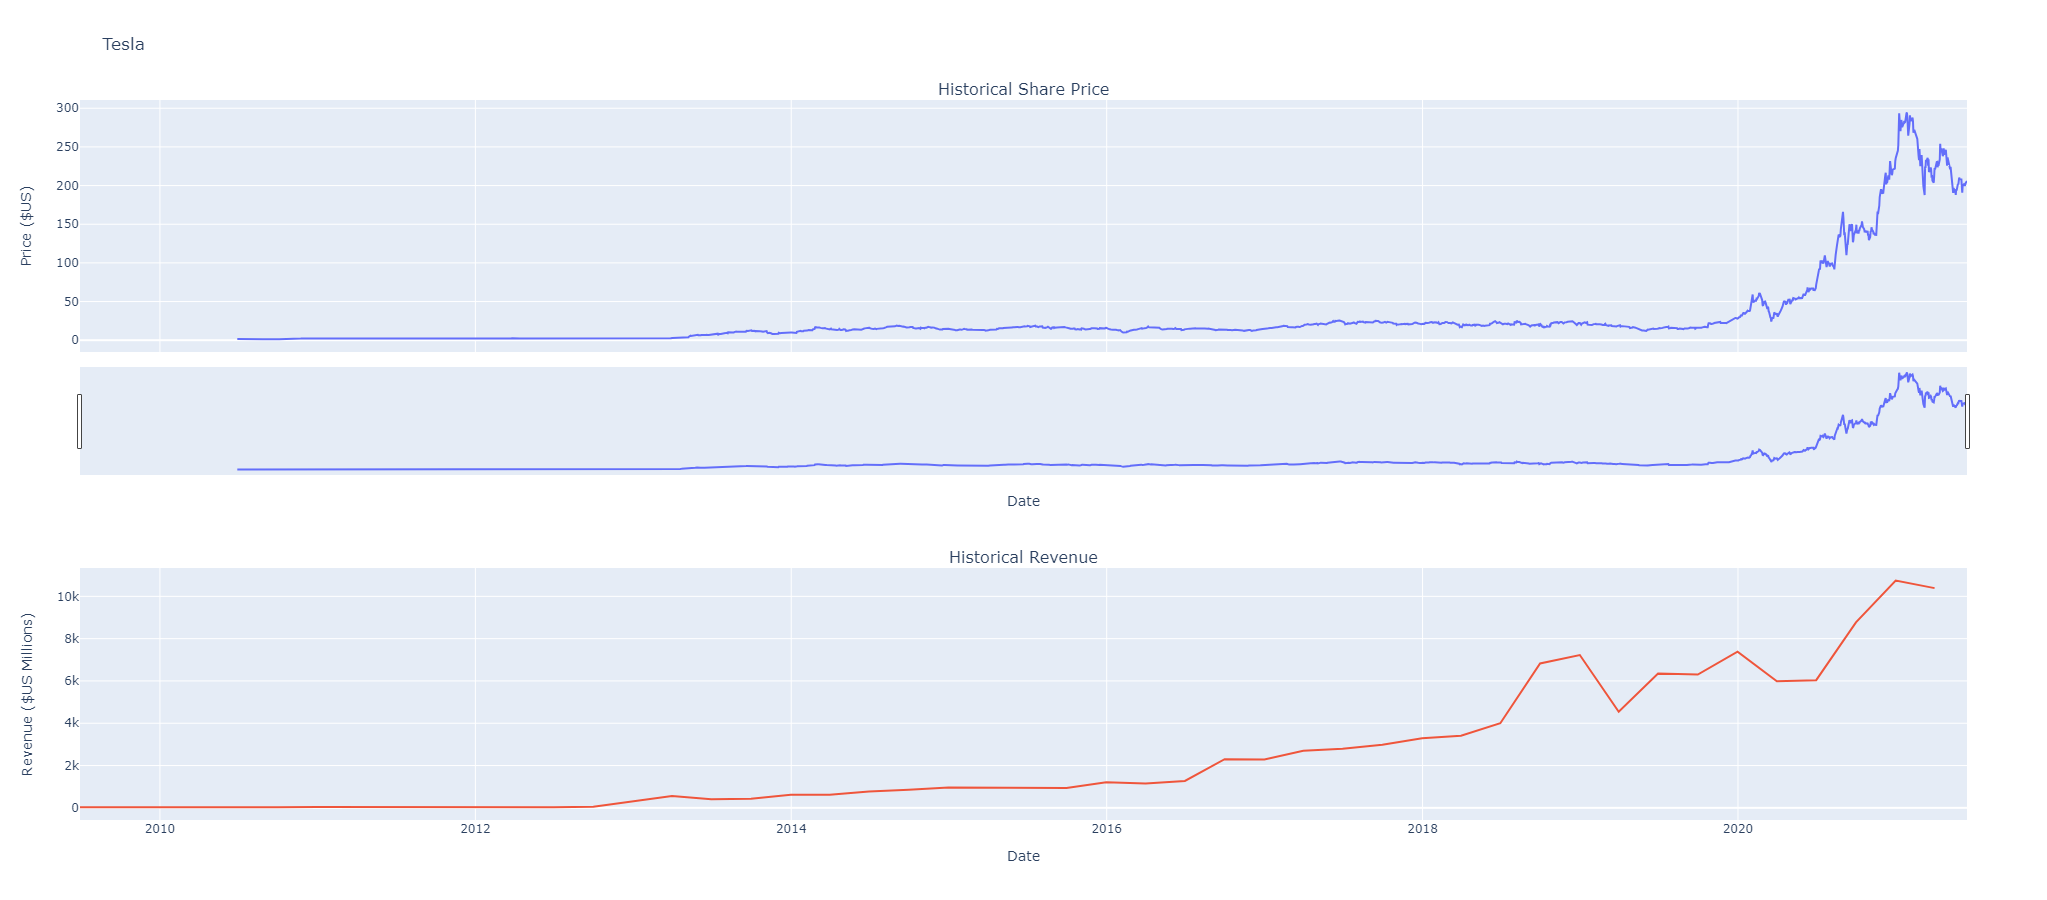

In [49]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

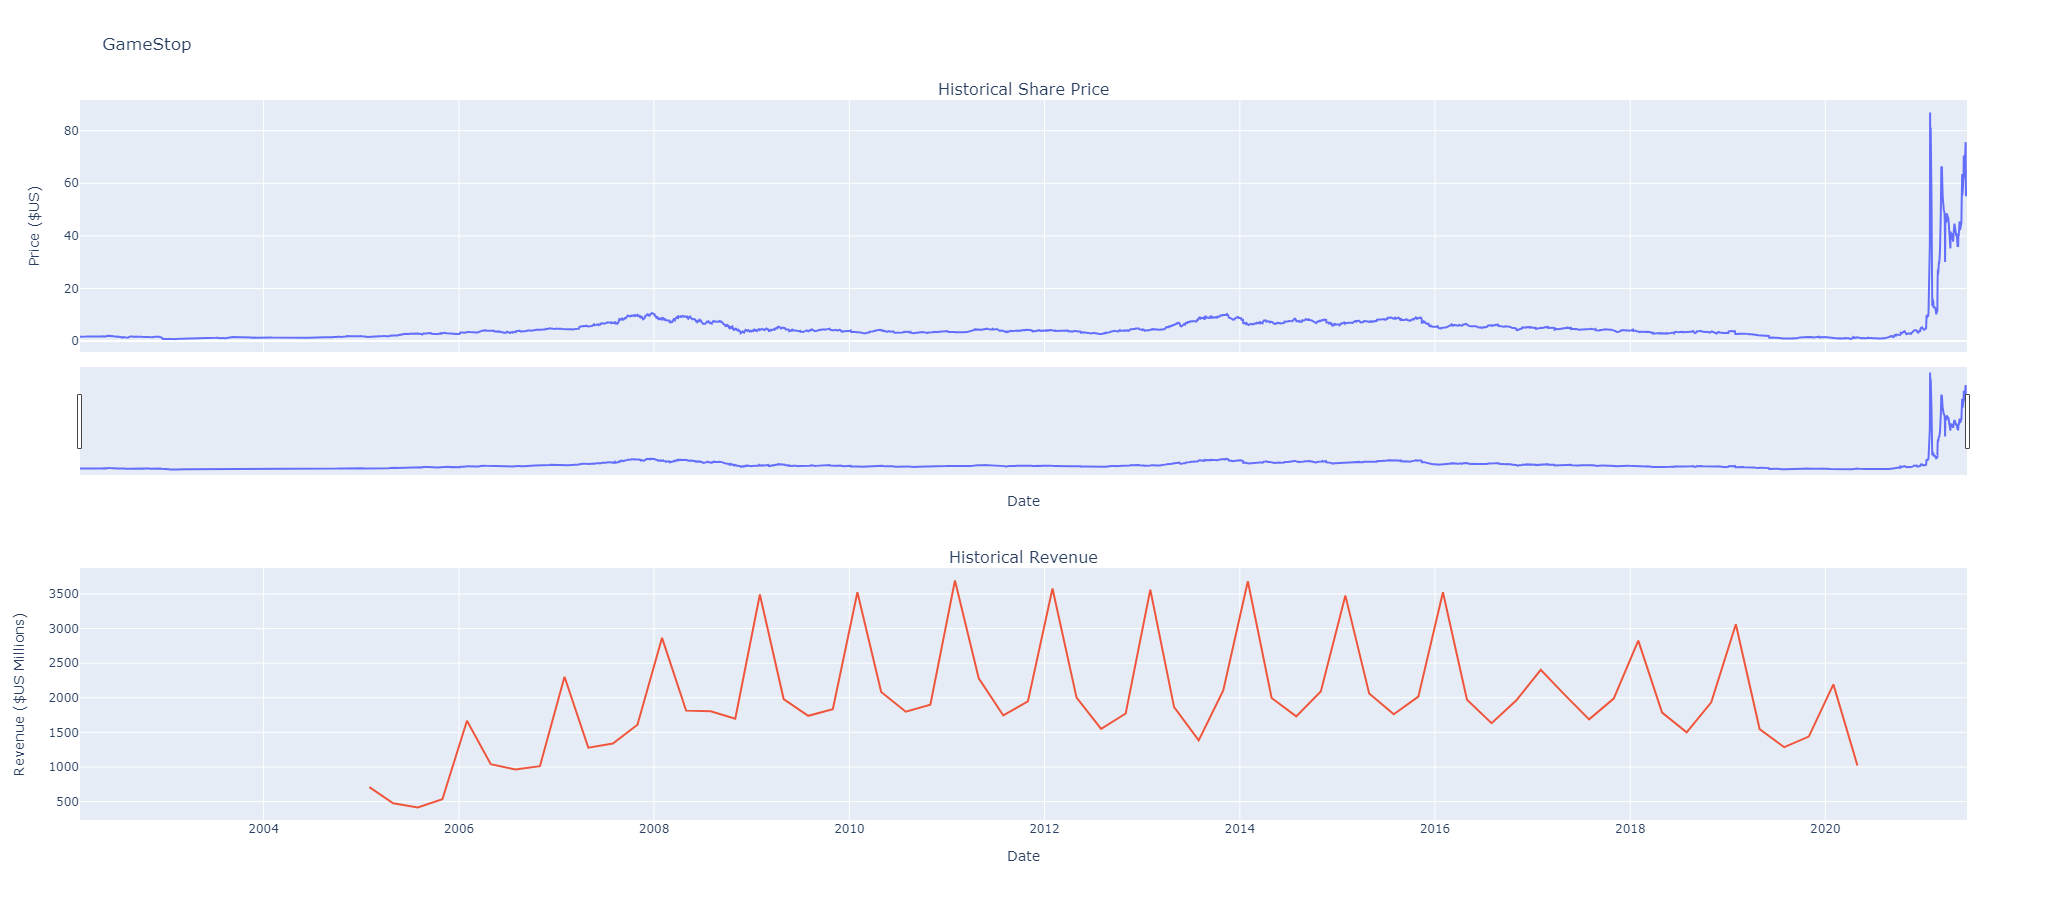

In [57]:
make_graph(gme_data, gme_revenue, 'GameStop')